## Tabalho Pratico 4

### Imports

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Carregando Imagens

In [24]:
img_bolhas = cv2.imread('bolhas.png')[:,:,::-1]
img_bolhas = cv2.cvtColor(img_bolhas, cv2.COLOR_RGB2GRAY)

img_coins = cv2.imread('coins-01.jpg')[:,:,::-1]
img_coins_gray = cv2.cvtColor(img_coins, cv2.COLOR_RGB2GRAY)

img_shapes = cv2.imread('shapes.png')[:,:,::-1]
img_shapes = cv2.cvtColor(img_shapes, cv2.COLOR_RGB2GRAY)

### Redução de ruido


In [26]:
#fig = plt.figure()
#fig.set_figheight(8)
#fig.set_figwidth(8)

#plt.subplot(1,2,1)
#plt.title("Imagem original")
#plt.plot(img_coins)

cv2.GaussianBlur(img_coins_gray, [7, 7], 0)
plt.imshow(img_coins_gray)

#plt.subplot(1,2,2)
#plt.title("Imagem alterada")
#plt.plot(img_coins)

NameError: name 'img_coins_gray' is not defined

### Remover fundo

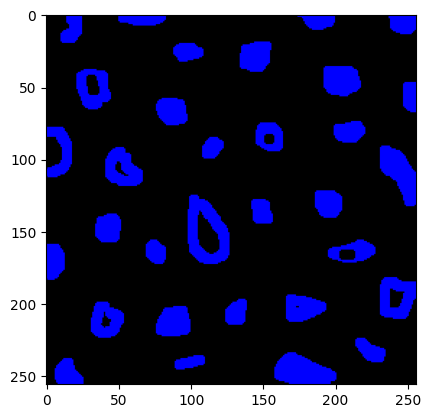

In [19]:

# Definir o intervalo de cor para o fundo que você deseja remover
lower_color = np.array([0, 0, 0])   # Cor inferior (ajuste conforme necessário)
upper_color = np.array([180, 255, 100])  # Cor superior (ajuste conforme necessário)

# Criar uma máscara para o fundo
mask = cv2.inRange(img_bolhas, lower_color, upper_color)

# Inverter a máscara
mask_inv = cv2.bitwise_not(mask)

# Extrair o primeiro plano
foreground = cv2.bitwise_and(img_bolhas, img_bolhas, mask=mask_inv)

plt.imshow(img_bolhas)